In [53]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os

from classy import Class


params_lcdm = {
    'output':'lCl,sCl,tCl',
    'temperature contributions' : 'lisw',
    'early/late isw redshift' : 3.2891327671177786,
    #'l_switch_limber_for_nc_local_over_z' : 400,
    #'l_switch_limber_for_nc_los_over_z' : 120,
    #'k_max_tau0_over_l_max' : 10,
    #'l_max_lss' : 3000,
    #'P_k_max_h/Mpc':10,
    #'selection_mean': [0.848397229458115, 3.2891327671177786],
    #'selection': 'dirac',
    'lensing':'y',
    'write background':'y',
    'input_verbose':10,
    'background_verbose':10,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
}

l_max_scalars = 2500
params_fe = {
    'output':'lCl,sCl,tCl',
    'temperature contributions' : 'lisw',
    'early/late isw redshift' : 3.2891327671177786,
    #'l_switch_limber_for_nc_local_over_z' : 400,
    #'l_switch_limber_for_nc_los_over_z' : 120,
    #'k_max_tau0_over_l_max' : 10,
    #'l_max_lss' : 3000,
    #'P_k_max_h/Mpc':10,
    #'selection_mean': [0.848397229458115, 3.2891327671177786],
    #'selection': 'dirac',
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_extended',
    'parameters_smg':' 0.5,1.0,0.1,1.,1e-20,0',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
}

params_fe2 = {
    'output':'lCl,sCl,tCl',
    'temperature contributions' : 'lisw',
    'early/late isw redshift' : 3.2891327671177786,
    #'l_switch_limber_for_nc_local_over_z' : 400,
    #'l_switch_limber_for_nc_los_over_z' : 120,
    #'k_max_tau0_over_l_max' : 10,
    #'l_max_lss' : 3000,
    #'P_k_max_h/Mpc':10,
    #'selection_mean': [0.848397229458115, 3.2891327671177786],
    #'selection': 'dirac',
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_extended',
    'parameters_smg':' 0.5,1.0,-0.1,1.,1e-20,0',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
}

params_fe3 = {
    'output':'lCl,sCl,tCl',
    'temperature contributions' : 'lisw',
    'early/late isw redshift' : 3.2891327671177786,
    #'l_switch_limber_for_nc_local_over_z' : 400,
    #'l_switch_limber_for_nc_los_over_z' : 120,
    #'k_max_tau0_over_l_max' : 10,
    #'l_max_lss' : 3000,
    #'P_k_max_h/Mpc':10,
    #'selection_mean': [0.848397229458115, 3.2891327671177786],
    #'selection': 'dirac',
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_extended',
    #'parameters_smg':' 1.,1.0,0.1,1.,1e-20,0',
    'parameters_smg':' 0.1,1.0,0.1,1.,1e-20,0',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
}

#k = 1e-4*np.array(range(1,60001))
l = np.array(range(2,l_max_scalars+1))
factor = l*(l+1)/(2*np.pi)
ll = np.array(range(2,2501))
factorl = ll*(ll+1)/(2*np.pi)

cosmo = Class()

cosmo.set(params_fe3)
cosmo.compute()

bkg_fe3=cosmo.get_background()
#print(bkg_fe3.viewkeys())
print(cosmo.age())

prtt_fe3=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

raw_cl3 = cosmo.raw_cl(l_max_scalars)
#raw_cl2.viewkeys()

lensed_cl3 = cosmo.lensed_cl(2500)
#lensed_cl3.viewkeys()

#PK3=np.zeros(60000)
#for i in range (0,59999):
#    PK3[i]=cosmo.pk(k[i],0)

cosmo.struct_cleanup()
cosmo.empty()









cosmo = Class()

cosmo.set(params_lcdm)
cosmo.compute()

bkg_lcdm=cosmo.get_background()
print("LCDM: " + str(cosmo.age()))

#PK_lcdm=np.zeros(60000)
#for i in range (0,59999):
#    PK_lcdm[i]=cosmo.pk(k[i],0)

prtt_lcdm=cosmo.get_perturbations()
#print(prtt.viewkeys())
#prt_lcdm=prtt_lcdm['scalar']
#prt_lcdm0=prt_lcdm[0]
#prt_lcdm1=prt_lcdm[1]
#print(prt[0].viewkeys())

raw_cl_lcdm = cosmo.raw_cl(l_max_scalars)
lensed_cl_lcdm = cosmo.lensed_cl(2500)

cosmo.struct_cleanup()
cosmo.empty()



cosmo = Class()
cosmo.set(params_fe)
cosmo.compute()

bkg_fe=cosmo.get_background()
#print(bkg_fe.viewkeys())
print(cosmo.age())

prtt_fe=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

l = np.array(range(2,l_max_scalars+1))
factor = l*(l+1)/(2*np.pi)
ll = np.array(range(2,2501))
factorl = ll*(ll+1)/(2*np.pi)
raw_cl = cosmo.raw_cl(l_max_scalars)
#raw_cl.viewkeys()

lensed_cl = cosmo.lensed_cl(2500)
#lensed_cl.viewkeys()

#k = 1e-4*np.array(range(1,60001))
#PK=np.zeros(60000)
#for i in range (0,59999):
#    PK[i]=cosmo.pk(k[i],0)

cosmo.struct_cleanup()
cosmo.empty()






cosmo.set(params_fe2)
cosmo.compute()

bkg_fe2=cosmo.get_background()
#print(bkg_fe2.viewkeys())
print(cosmo.age())

prtt_fe2=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

raw_cl2 = cosmo.raw_cl(l_max_scalars)
#raw_cl2.viewkeys()

lensed_cl2 = cosmo.lensed_cl(2500)
#lensed_cl2.viewkeys()

#PK2=np.zeros(60000)
#for i in range (0,59999):
#    PK2[i]=cosmo.pk(k[i],0)

#cosmo.struct_cleanup()
#cosmo.empty()

KeyboardInterrupt: 

/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34672/991015868.py:31: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(l,(raw_cl['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34672/991015868.py:33: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(l,(raw_cl2['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34672/991015868.py:35: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(l,(raw_cl3['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])


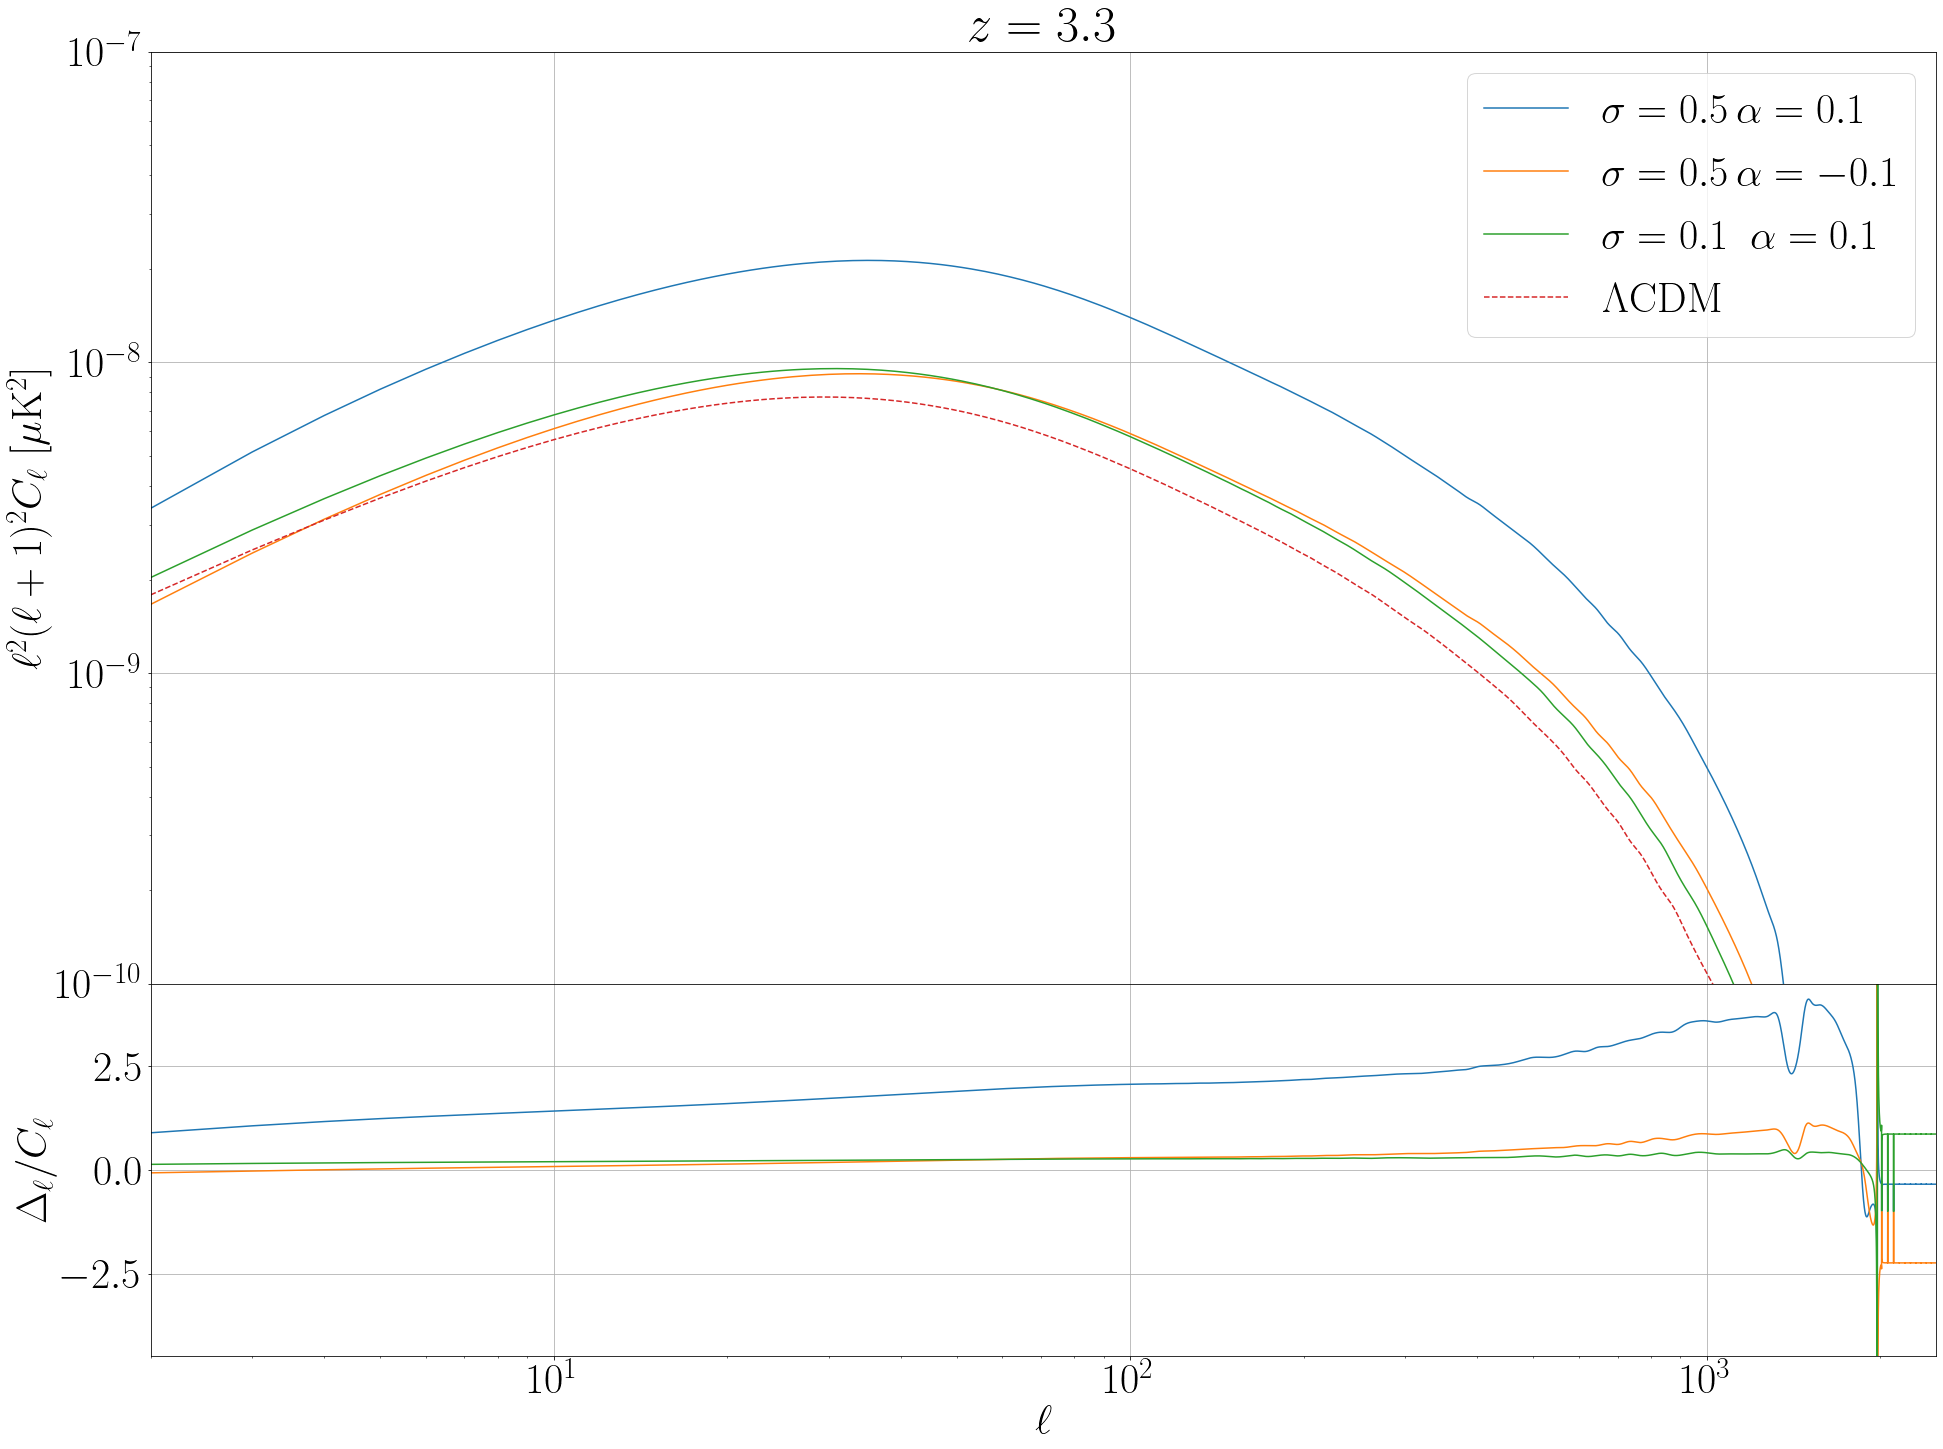

In [52]:
text_size=42
fig_size_x=32
fig_size_y=24

T0=2.7255

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)


f,axarr = plt.subplots(2,1,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w',gridspec_kw = {'height_ratios':[1, 0.4]})

axarr[0].loglog(raw_cl['ell'][2:],raw_cl['ell'][2:]**2*(raw_cl['ell'][2:]+1)**2*raw_cl['tt'][2:],label='$\\sigma=0.5 \,\\alpha=0.1$')
axarr[0].loglog(raw_cl2['ell'][2:],raw_cl2['ell'][2:]**2*(raw_cl2['ell'][2:]+1)**2*raw_cl2['tt'][2:],label='$\\sigma=0.5 \,\\alpha=-0.1$')
axarr[0].loglog(raw_cl3['ell'][2:],raw_cl3['ell'][2:]**2*(raw_cl3['ell'][2:]+1)**2*raw_cl3['tt'][2:],label='$\\sigma=0.1 \,\,\,\\alpha=0.1$')
axarr[0].loglog(raw_cl_lcdm['ell'][2:],raw_cl_lcdm['ell'][2:]**2*(raw_cl_lcdm['ell'][2:]+1)**2*raw_cl_lcdm['tt'][2:],'--',label='$\Lambda$CDM')
axarr[0].title.set_text('$z=3.3$')
axarr[0].set_ylim(1e-10,1e-7)
axarr[0].set_xlim(2,2500)
axarr[0].legend()
#axarr[0].title("$k=0.1$")
axarr[0].set_ylabel("$\ell^2 (\ell+1)^2 C_\ell$ $[\mu$K$^2]$")
axarr[0].set_xlabel("$\ell$")

axarr[0].grid(True)

axarr[1].semilogx(l,(raw_cl['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])

axarr[1].semilogx(l,(raw_cl2['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])

axarr[1].semilogx(l,(raw_cl3['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])

axarr[1].grid(True)

axarr[1].set_ylabel("$\Delta_\ell/C_\ell$")
axarr[1].set_xlabel("$\ell$")

axarr[1].set_xlim(2,2500)
axarr[1].set_ylim(-4.5,4.5)

#customticks2=[1e-3,1e-2,1e-1]
#axarr[0].set_xticks(customticks2)

f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)

In [48]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os

from classy import Class


params_lcdm = {
    'output':'lCl,sCl,tCl',
    'temperature contributions' : 'lisw',
    'early/late isw redshift' : 0.85,
    #'l_switch_limber_for_nc_local_over_z' : 400,
    #'l_switch_limber_for_nc_los_over_z' : 120,
    #'k_max_tau0_over_l_max' : 10,
    #'l_max_lss' : 3000,
    #'P_k_max_h/Mpc':10,
    #'selection_mean': [0.848397229458115, 3.2891327671177786],
    #'selection': 'dirac',
    'lensing':'y',
    'write background':'y',
    'input_verbose':10,
    'background_verbose':10,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
}

l_max_scalars = 2500
params_fe = {
    'output':'lCl,sCl,tCl',
    'temperature contributions' : 'lisw',
    'early/late isw redshift' : 0.85,
    #'l_switch_limber_for_nc_local_over_z' : 400,
    #'l_switch_limber_for_nc_los_over_z' : 120,
    #'k_max_tau0_over_l_max' : 10,
    #'l_max_lss' : 3000,
    #'P_k_max_h/Mpc':10,
    #'selection_mean': [0.848397229458115, 3.2891327671177786],
    #'selection': 'dirac',
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_extended',
    'parameters_smg':' 0.5,1.0,0.1,1.,1e-20,0',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
}

params_fe2 = {
    'output':'lCl,sCl,tCl',
    'temperature contributions' : 'lisw',
    'early/late isw redshift' : 0.85,
    #'l_switch_limber_for_nc_local_over_z' : 400,
    #'l_switch_limber_for_nc_los_over_z' : 120,
    #'k_max_tau0_over_l_max' : 10,
    #'l_max_lss' : 3000,
    #'P_k_max_h/Mpc':10,
    #'selection_mean': [0.848397229458115, 3.2891327671177786],
    #'selection': 'dirac',
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_extended',
    'parameters_smg':' 0.5,1.0,-0.1,1.,1e-20,0',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
}

params_fe3 = {
    'output':'lCl,sCl,tCl',
    'temperature contributions' : 'lisw',
    'early/late isw redshift' : 0.85,
    #'l_switch_limber_for_nc_local_over_z' : 400,
    #'l_switch_limber_for_nc_los_over_z' : 120,
    #'k_max_tau0_over_l_max' : 10,
    #'l_max_lss' : 3000,
    #'P_k_max_h/Mpc':10,
    #'selection_mean': [0.848397229458115, 3.2891327671177786],
    #'selection': 'dirac',
    'lensing':'y',
    'l_max_scalars':l_max_scalars,
    'write background':'y',
    'gravity_model':'quintessence_extended',
    #'parameters_smg':' 1.,1.0,0.1,1.,1e-20,0',
    'parameters_smg':' 0.1,1.0,0.1,1.,1e-20,0',
    'Omega_Lambda' : 0.,
    'Omega_fld' : 0.,
    'Omega_smg' : -1,
    #'hubble_evolution':'false',
    'input_verbose':10,
    'background_verbose':10,
    'tuning_index_smg': 1,
    'tuning_dxdy_guess_smg': 1,
    #'Omega_b' : 0.0486,
    #'Omega_cdm':0.2589,
    'omega_b':0.02222,
    'omega_cdm':0.1197,
    'H0':67.556,
    #'h':0.6731,
    'N_eff':3.13,
    'YHe':0.252,
    'z_reio':9.9,
    'A_s':2.198e-9,
    'n_s':0.9655,
    'non linear':'halofit'
}

#k = 1e-4*np.array(range(1,60001))
l = np.array(range(2,l_max_scalars+1))
factor = l*(l+1)/(2*np.pi)
ll = np.array(range(2,2501))
factorl = ll*(ll+1)/(2*np.pi)

cosmo = Class()

cosmo.set(params_fe3)
cosmo.compute()

bkg_fe3=cosmo.get_background()
#print(bkg_fe3.viewkeys())
print(cosmo.age())

prtt_fe3=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

raw_cl3 = cosmo.raw_cl(l_max_scalars)
#raw_cl2.viewkeys()

lensed_cl3 = cosmo.lensed_cl(2500)
#lensed_cl3.viewkeys()

#PK3=np.zeros(60000)
#for i in range (0,59999):
#    PK3[i]=cosmo.pk(k[i],0)

cosmo.struct_cleanup()
cosmo.empty()









cosmo = Class()

cosmo.set(params_lcdm)
cosmo.compute()

bkg_lcdm=cosmo.get_background()
print("LCDM: " + str(cosmo.age()))

#PK_lcdm=np.zeros(60000)
#for i in range (0,59999):
#    PK_lcdm[i]=cosmo.pk(k[i],0)

prtt_lcdm=cosmo.get_perturbations()
#print(prtt.viewkeys())
#prt_lcdm=prtt_lcdm['scalar']
#prt_lcdm0=prt_lcdm[0]
#prt_lcdm1=prt_lcdm[1]
#print(prt[0].viewkeys())

raw_cl_lcdm = cosmo.raw_cl(l_max_scalars)
lensed_cl_lcdm = cosmo.lensed_cl(2500)

cosmo.struct_cleanup()
cosmo.empty()



cosmo = Class()
cosmo.set(params_fe)
cosmo.compute()

bkg_fe=cosmo.get_background()
#print(bkg_fe.viewkeys())
print(cosmo.age())

prtt_fe=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

l = np.array(range(2,l_max_scalars+1))
factor = l*(l+1)/(2*np.pi)
ll = np.array(range(2,2501))
factorl = ll*(ll+1)/(2*np.pi)
raw_cl = cosmo.raw_cl(l_max_scalars)
#raw_cl.viewkeys()

lensed_cl = cosmo.lensed_cl(2500)
#lensed_cl.viewkeys()

#k = 1e-4*np.array(range(1,60001))
#PK=np.zeros(60000)
#for i in range (0,59999):
#    PK[i]=cosmo.pk(k[i],0)

cosmo.struct_cleanup()
cosmo.empty()






cosmo.set(params_fe2)
cosmo.compute()

bkg_fe2=cosmo.get_background()
#print(bkg_fe2.viewkeys())
print(cosmo.age())

prtt_fe2=cosmo.get_perturbations()
#print(prtt_fe.viewkeys())
#prt_fe=prtt_fe['scalar']
#prt_fe0=prt_fe[0]
#prt_fe1=prt_fe[1]
#print(prt_fe[0].viewkeys())

raw_cl2 = cosmo.raw_cl(l_max_scalars)
#raw_cl2.viewkeys()

lensed_cl2 = cosmo.lensed_cl(2500)
#lensed_cl2.viewkeys()

#PK2=np.zeros(60000)
#for i in range (0,59999):
#    PK2[i]=cosmo.pk(k[i],0)

#cosmo.struct_cleanup()
#cosmo.empty()

13.713866004103068
LCDM: 13.808712383316225
13.350695044405999
13.460736901422615


/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34672/594598297.py:31: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(l,(raw_cl['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34672/594598297.py:33: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(l,(raw_cl2['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])
/var/folders/j_/8tkdbhd13rgghbfq7qg33vn00000gn/T/ipykernel_34672/594598297.py:35: RuntimeWarning: invalid value encountered in true_divide
  axarr[1].semilogx(l,(raw_cl3['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])


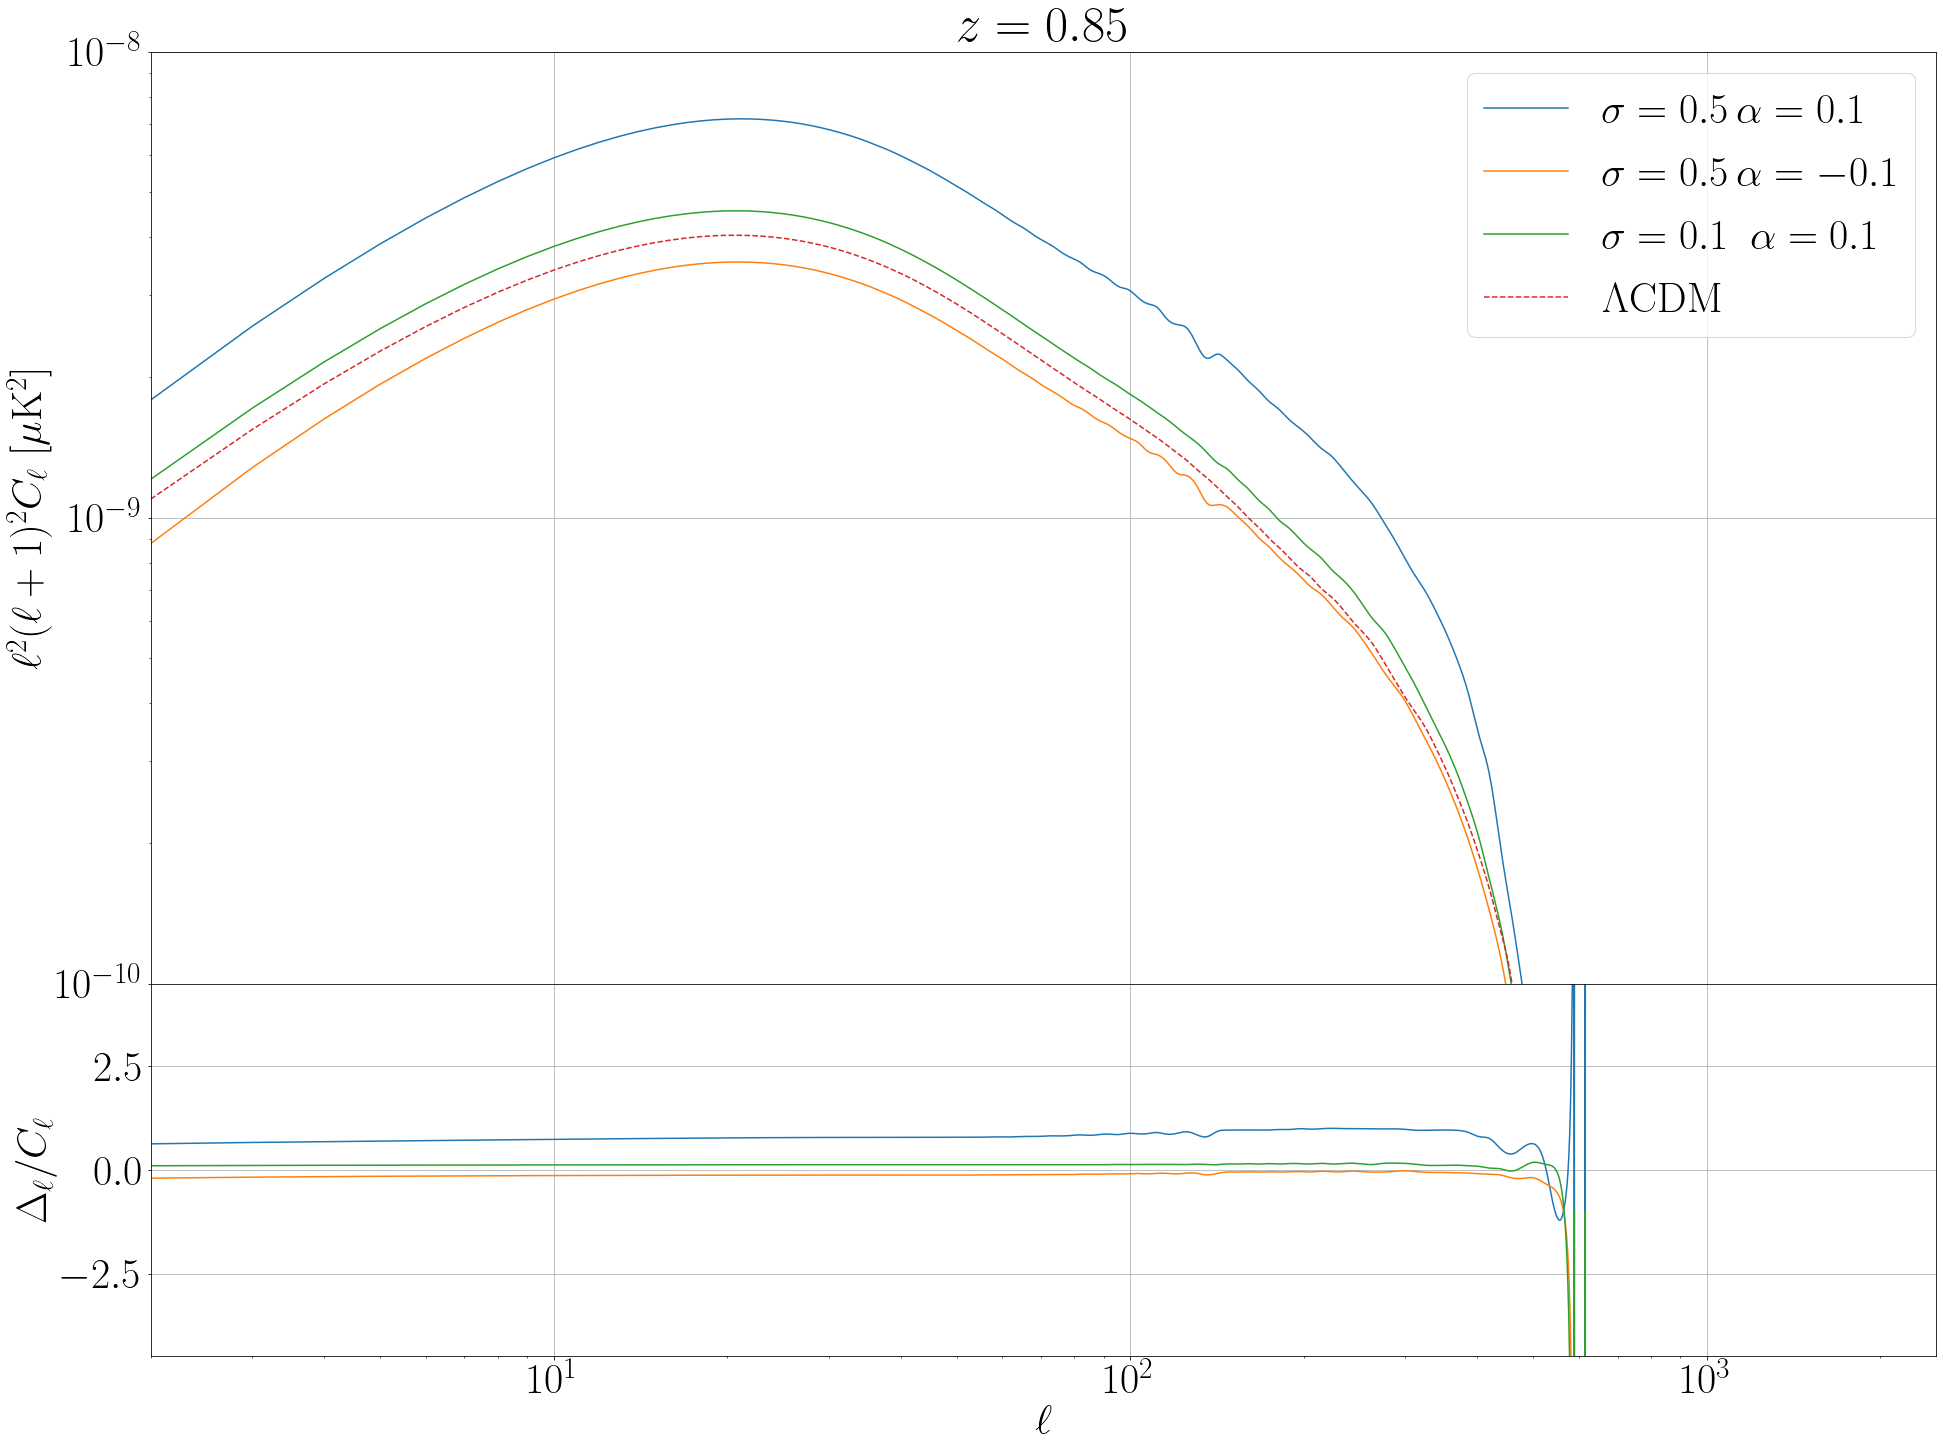

In [50]:
text_size=42
fig_size_x=32
fig_size_y=24

T0=2.7255

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)


f,axarr = plt.subplots(2,1,sharey=False, sharex=False,figsize=(fig_size_x,fig_size_y), facecolor='w',gridspec_kw = {'height_ratios':[1, 0.4]})

axarr[0].loglog(raw_cl['ell'][2:],raw_cl['ell'][2:]**2*(raw_cl['ell'][2:]+1)**2*raw_cl['tt'][2:],label='$\\sigma=0.5 \,\\alpha=0.1$')
axarr[0].loglog(raw_cl2['ell'][2:],raw_cl2['ell'][2:]**2*(raw_cl2['ell'][2:]+1)**2*raw_cl2['tt'][2:],label='$\\sigma=0.5 \,\\alpha=-0.1$')
axarr[0].loglog(raw_cl3['ell'][2:],raw_cl3['ell'][2:]**2*(raw_cl3['ell'][2:]+1)**2*raw_cl3['tt'][2:],label='$\\sigma=0.1 \,\,\,\\alpha=0.1$')
axarr[0].loglog(raw_cl_lcdm['ell'][2:],raw_cl_lcdm['ell'][2:]**2*(raw_cl_lcdm['ell'][2:]+1)**2*raw_cl_lcdm['tt'][2:],'--',label='$\Lambda$CDM')
axarr[0].title.set_text('$z=0.85$')
axarr[0].set_ylim(1e-10,1e-8)
axarr[0].set_xlim(2,2500)
axarr[0].legend()
#axarr[0].title("$k=0.1$")
axarr[0].set_ylabel("$\ell^2 (\ell+1)^2 C_\ell$ $[\mu$K$^2]$")
axarr[0].set_xlabel("$\ell$")

axarr[0].grid(True)

axarr[1].semilogx(l,(raw_cl['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])

axarr[1].semilogx(l,(raw_cl2['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])

axarr[1].semilogx(l,(raw_cl3['tt'][2:]-raw_cl_lcdm['tt'][2:])/raw_cl_lcdm['tt'][2:])

axarr[1].grid(True)

axarr[1].set_ylabel("$\Delta_\ell/C_\ell$")
axarr[1].set_xlabel("$\ell$")

axarr[1].set_xlim(2,2500)
axarr[1].set_ylim(-4.5,4.5)

#customticks2=[1e-3,1e-2,1e-1]
#axarr[0].set_xticks(customticks2)

f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)